In [1]:
# do this if you use a custom virtual environment to specify the directory to look for installed packages
import sys
import os
## goes back to the project directory
os.chdir("..")
# switch to the name of your virtual environment
kernel_name = ".venv_mp"
sys.path.append("\\".join([os.getcwd(), kernel_name, "Lib\\site-packages"]))

In [79]:
import pandas as pd
import os

def read_banking_data():
    directory = "//".join([os.getcwd(), "data", "bank-marketing", "bank-additional-full.csv"])
    df = pd.read_csv(directory, sep=";")

    for column in df.columns:
        column_type = str(df[column].dtype)
        if "int" not in column_type and "float" not in column_type:
            df[column] = df[column].astype("category")

    cat_columns = df.select_dtypes(['category']).columns
    df_codified = df.copy()
    df_codified[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    
    return df, df_codified

In [80]:
df, df_codified = read_banking_data()

In [121]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_codified.loc[:,df_codified.columns!="y"])
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:3]))
print(sum(pca.explained_variance_ratio_[:2]))

[6.26788004e-01 3.30833615e-01 4.08471400e-02 1.01374092e-03
 1.92314271e-04 1.20238712e-04 6.96673197e-05 4.96416195e-05
 3.82617908e-05 1.80198272e-05 9.08848239e-06 7.24184225e-06
 4.84543109e-06 2.87288460e-06 1.92717561e-06 1.42287924e-06
 1.31112996e-06 2.47969899e-07 2.17159931e-07 1.81502791e-07]
0.998468759079651
0.9576216190451263


In [146]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(df_codified.loc[:,df_codified.columns!="y"])
df_reduced = pd.DataFrame(data = reduced, columns = ["x", "y", "z"])
df_reduced["label"] = df.y

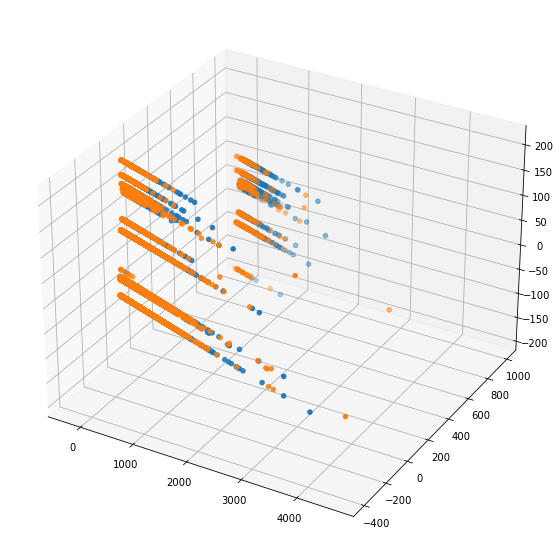

In [147]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
yes = df_reduced.loc[df_reduced.label == "yes"]
no = df_reduced.loc[df_reduced.label == "no"]
ax.scatter3D(yes.x, yes.y, yes.z)
ax.scatter3D(no.x, no.y, no.z)

In [148]:
yes

,x,y,z,label
75,1309.716306,-139.818588,-27.288823,yes
83,778.270085,-99.310952,-23.434497,yes
88,1202.030914,-131.593397,-26.500166,yes
129,316.619360,-64.152154,-20.096841,yes
139,198.964428,-55.187056,-19.249488,yes
...,...,...,...,...
41174,24.765061,982.723753,45.427242,yes
41178,298.593198,956.908273,44.241141,yes
41181,23.902774,-4.924813,206.592512,yes
41183,76.749540,-8.879355,206.230611,yes


In [149]:
no

,x,y,z,label
0,-0.451809,-39.973288,-17.802099,no
1,-112.125804,-31.459774,-16.990698,no
2,-35.351193,-37.347033,-17.554230,no
3,-110.131661,-31.649277,-17.017673,no
4,45.413489,-43.463635,-18.129900,no
...,...,...,...,...
41180,-3.019292,-2.876659,206.779998,no
41182,-71.547251,982.072276,47.388449,no
41184,125.605839,-12.655857,205.859888,no
41185,-67.829304,2.102353,207.262893,no


In [150]:
df_reduced

,x,y,z,label
0,-0.451809,-39.973288,-17.802099,no
1,-112.125804,-31.459774,-16.990698,no
2,-35.351193,-37.347033,-17.554230,no
3,-110.131661,-31.649277,-17.017673,no
4,45.413489,-43.463635,-18.129900,no
...,...,...,...,...
41183,76.749540,-8.879355,206.230611,yes
41184,125.605839,-12.655857,205.859888,no
41185,-67.829304,2.102353,207.262893,no
41186,184.433189,-17.136988,205.436845,yes


In [155]:
pd.DataFrame(pca.inverse_transform(reduced), columns = df.columns[:-1])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39.937824,3.694095,1.155151,3.711167,0.234801,1.056970,0.328280,0.408856,4.066467,2.016350,260.999404,2.695037,998.958260,0.073867,0.929090,0.547006,93.670930,-40.397592,4.158353,5191.036508
1,39.949865,3.706758,1.153510,3.727907,0.235320,1.061019,0.328525,0.411766,4.071495,2.002723,148.998458,2.773389,998.953379,0.077349,0.925937,0.539986,93.664764,-40.381000,4.152705,5191.031873
2,39.941518,3.698030,1.154630,3.716375,0.234975,1.058229,0.328356,0.409786,4.067970,2.012095,226.000493,2.719581,998.989576,0.074890,0.928085,0.545018,93.669041,-40.392418,4.156828,5191.046208
3,39.949571,3.706505,1.153526,3.727577,0.235330,1.060935,0.328521,0.411747,4.071283,2.002974,151.001377,2.772087,998.988322,0.077203,0.925984,0.540462,93.664944,-40.381242,4.153212,5191.050303
4,39.932893,3.688900,1.155830,3.704300,0.234581,1.055312,0.328179,0.407650,4.064447,2.021943,306.998472,2.662823,998.955034,0.072458,0.930380,0.549763,93.673435,-40.404451,4.160527,5191.032040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,40.118608,3.806224,1.316231,3.892035,-0.003330,1.206428,0.318215,0.010796,5.791974,1.858833,333.997778,1.399166,998.966654,0.583409,0.536410,-4.079612,92.630657,-42.693982,-1.131530,4963.599500
41184,40.113232,3.800648,1.316931,3.884670,-0.003531,1.204643,0.318109,0.009568,5.789616,1.864805,383.001173,1.365013,999.017329,0.581772,0.537774,-4.076086,92.633445,-42.701182,-1.128532,4963.625413
41185,40.134110,3.822587,1.314089,3.913670,-0.002632,1.211654,0.318533,0.014607,5.798317,1.841202,188.998840,1.500734,998.997061,0.587817,0.532328,-4.088227,92.622772,-42.672392,-1.138296,4963.617938
41186,40.106898,3.793982,1.317799,3.875857,-0.003810,1.202514,0.317980,0.008026,5.787003,1.871980,442.000449,1.323712,999.017072,0.579953,0.539430,-4.072485,92.636671,-42.709961,-1.125669,4963.622951


In [152]:
df_codified

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
